# Differentiall equation systems

### Task 1

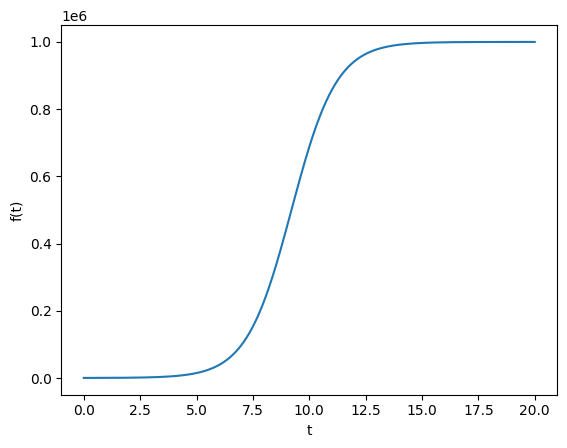

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
a = 1 # a > 0
k = 1e6 # k > 0
x0 = 100

# Define function f(t)
def f(t):
    return (k*x0*np.exp(a*t)) / (k - x0 + x0*np.exp(a*t))

# Plot f(t)
t = np.linspace(0, 20, 1000)
y = f(t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

### Task 11

**Objective:** Solve the Lotka-Volterra system of differential equations using Euler's explicit and symplectic (semi-implicit) Euler methods, and compare the results.

#### Lotka-Volterra Equations

The Lotka-Volterra system of equations is given by:

\[
\frac{dx}{dt} = x (1 - y)  
\]
\[
\frac{dy}{dt} = y (x - 1) 
\]

#### Numerical Methods

1. **Euler's Explicit Method**

    For Euler's explicit method, we update \( x \) and \( y \) as follows:
    \[
    x_{n+1} = x_n + h \cdot x_n (1 - y_n)  
    \]
    \[
    y_{n+1} = y_n + h \cdot y_n (x_n - 1)
    \]

2. **Symplectic Euler Method (Semi-Implicit Euler)**

    For the symplectic Euler method, the update equations are:
    \[
    x_{n+1} = x_n + h \cdot x_n (1 - y_n)  
    \]
    \[
    y_{n+1} = y_n + h \cdot y_n (x_{n+1} - 1)
    \]

#### Function Evaluation

In each loop iteration, we also evaluate the function:

\[
f(x_n, y_n) = x_n + y_n - \ln |x_n| - \ln |y_n|
\]

This function serves as a way to compare the energy-like conservation properties of the two methods.


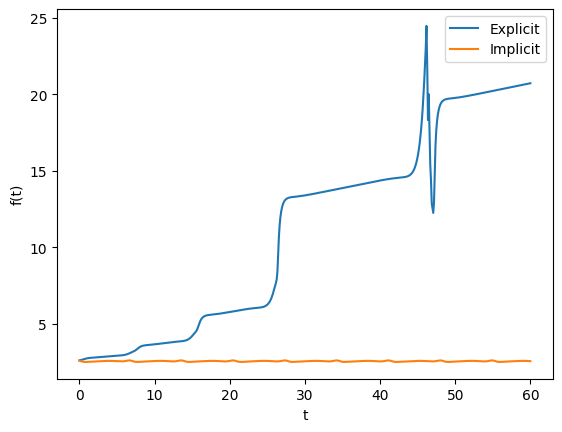

In [11]:
# import necessary libraries
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
T = 60 # Time
h = 0.1 # Step size
N = int(T/h) # Number of steps
x1, x2, y1, y2 = 2, 2, 2, 2 # Initial values
f_explicit, f_implicit = [], [] # Lists to store the function values

# Eulers explicit method
# x_n+1 = x_n + h*x_n(1 - y_n)  
# y_n+1 = y_n + h*y_n(x_n - 1)

# Eulers implicit method
# x_n+1 = x_n + h*x_n(1 - y_n) 
# y_n+1 = y_n + h*y_n(x_n+1 - 1)    


for n in range(N):
    
    # Eulers explicit method
    new_explicit_x = x1 + h*x1*(1 - y1)
    new_explicit_y = y1 + h*y1*(x1 - 1)
    
    # Eulers implicit method
    new_implicit_x = x2 + h*x2*(1 - y2)
    new_implicit_y = y2 + h*y2*(new_implicit_x - 1)
    
    # Update x and y
    x1, y1 = new_explicit_x, new_explicit_y
    x2, y2 = new_implicit_x, new_implicit_y
    
    # Evaluate the function f(t)
    f_eval_explicit = x1 + y1 - np.log(abs(x1)) - np.log(abs(y1))
    f_eval_implicit = x2 + y2 - np.log(abs(x2)) - np.log(abs(y2))
    
    # append the values to the list@
    f_explicit.append(f_eval_explicit)
    f_implicit.append(f_eval_implicit)

# plot the function values
plt.plot(np.linspace(0, T, N), f_explicit, label='Explicit')
plt.plot(np.linspace(0, T, N), f_implicit, label='Implicit')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()
    
    


### Task 12

**Objective:** Solve the pendulum system of differential equations using Euler's explicit and symplectic (semi-implicit) Euler methods, and compare the results.

#### Pendulum Equations
p_dot = q
q_dot = - g/l * sin(p)

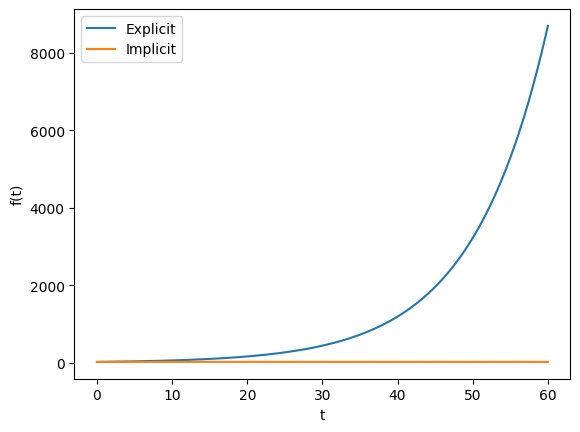

In [12]:
# Define constants
T = 60 # Time
h = 0.1 # Step size
N = int(T/h) # Number of steps
p_dot1, q_dot1, p_dot2, q_dot2 = (3/2)*np.pi, (3/2)*np.pi, (3/2)*np.pi, (3/2)*np.pi # Initial values
f_explicit, f_implicit = [], [] # Lists to store the function values

# Eulers explicit method
# p_dot_n+1 = p_dot_n + h*q_dot_n
# q_dot_n+1 = q_dot_n - h*p_dot_n

# Eulers implicit method
# p_dot_n+1 = p_dot_n + h*q_dot_n
# q_dot_n+1 = q_dot_n - h*p_dot_n+1

for n in range(N):
        
    # Eulers explicit method
    new_explicit_p_dot = p_dot1 + h*q_dot1
    new_explicit_q_dot = q_dot1 - h*p_dot1
    
    # Eulers implicit method
    new_implicit_p_dot = p_dot2 + h*q_dot2
    new_implicit_q_dot = q_dot2 - h*new_implicit_p_dot
    
    # Update p_dot and q_dot
    p_dot1, q_dot1 = new_explicit_p_dot, new_explicit_q_dot
    p_dot2, q_dot2 = new_implicit_p_dot, new_implicit_q_dot
    
    # Evaluate the function f(t)
    f_eval_explicit = (1/2)*(p_dot1**2 + q_dot1**2)
    f_eval_implicit = (1/2)*(p_dot2**2 + q_dot2**2)
    
    # append the values to the list
    f_explicit.append(f_eval_explicit)
    f_implicit.append(f_eval_implicit)
        
# plot the function values
plt.plot(np.linspace(0, T, N), f_explicit, label='Explicit')
plt.plot(np.linspace(0, T, N), f_implicit, label='Implicit')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

        

### Task 13

**Objective:** Solve van der Pols numerically with mu = 2 and plot x against x_dot

#### van der Pol Equations
- x1_dot = x2
- x2_dot = -mu * (x1^2 - 1) * x2 - x1


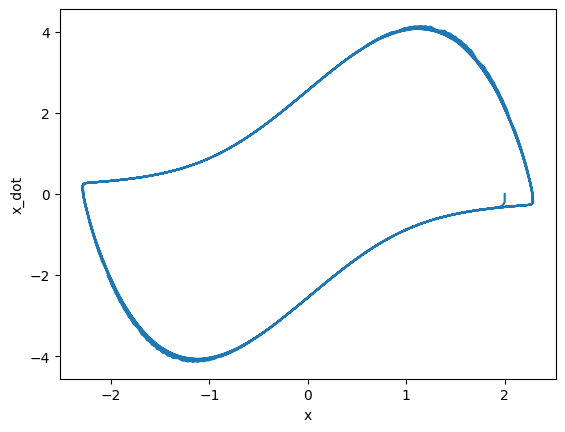

In [41]:
# Define constants
mu = 2
T = 60 # Time
h = 0.1 # Step size
N = int(T/h) # Number of steps
x, y = 2, 0 # Initial values
x_values, y_values = [], [] # Lists to store the x and y values

# van der Pols equation
# x_dot = y
# y_dot = - mu * (x^2 - 1) * y - x

# Solve using Euler's method
for n in range(N):
    
    new_x = x + h * y
    new_y = y + h * (-mu * (x**2 - 1) * y - x)
    
    # append x and y values to the lists
    x_values.append(x)
    y_values.append(y)
    
    # Update x and y
    x, y = new_x, new_y
    
# Plot the function values
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("x_dot")
plt.show()
